# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Observations
# 1. Temperature correlates with latitude, which was expected. 
#    The temperture decreases as you move away from the equator
# 2. There is no correlation between the latitude and the humidity, as well as cloudiness and windspeed.
# 3. As you move north or south wind speed tends to increase 
#    and as you get to the north or south pole windspeed is at a max.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os.path

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=2172797&APPID="
target_url = url + weather_api_key

In [4]:
# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0
    
# Loop through the list of cities and perform a request for data on each
for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print("Done processing through city data.")

Processing record 1 of Set 1 | puerto ayora
Processing record 2 of Set 1 | verkhnevilyuysk
Processing record 3 of Set 1 | maceio
Processing record 4 of Set 1 | grindavik
Processing record 5 of Set 1 | coahuayana
Processing record 6 of Set 1 | atuona
Processing record 7 of Set 1 | gazli
Processing record 8 of Set 1 | vaini
Processing record 9 of Set 1 | aksu
Processing record 10 of Set 1 | norman wells
Processing record 11 of Set 1 | butaritari
Record not found
Record not found
Processing record 12 of Set 1 | san policarpo
Processing record 13 of Set 1 | chimore
Processing record 14 of Set 1 | mataura
Processing record 15 of Set 1 | palmer
Processing record 16 of Set 1 | bredasdorp
Processing record 17 of Set 1 | cherskiy
Processing record 18 of Set 1 | kapaa
Processing record 19 of Set 1 | port elizabeth
Processing record 20 of Set 1 | port alfred
Processing record 21 of Set 1 | arlit
Processing record 22 of Set 1 | tasiilaq
Processing record 23 of Set 1 | hermanus
Processing record 24

Processing record 188 of Set 1 | kearney
Processing record 189 of Set 1 | samfya
Processing record 190 of Set 1 | malanje
Processing record 191 of Set 1 | yabrud
Processing record 192 of Set 1 | homer
Processing record 193 of Set 1 | inirida
Processing record 194 of Set 1 | blagoyevo
Processing record 195 of Set 1 | kodiak
Processing record 196 of Set 1 | ponta do sol
Processing record 197 of Set 1 | mahebourg
Record not found
Processing record 198 of Set 1 | egvekinot
Processing record 199 of Set 1 | bosaso
Processing record 200 of Set 1 | deep river
Processing record 201 of Set 1 | santa vitoria
Processing record 202 of Set 1 | cidreira
Processing record 203 of Set 1 | kamaishi
Processing record 204 of Set 1 | mozarlandia
Processing record 205 of Set 1 | loandjili
Processing record 206 of Set 1 | pushkino
Processing record 207 of Set 1 | sur
Processing record 208 of Set 1 | kabare
Processing record 209 of Set 1 | namibe
Processing record 210 of Set 1 | ocara
Processing record 211 of 

Processing record 378 of Set 1 | ilulissat
Processing record 379 of Set 1 | labytnangi
Processing record 380 of Set 1 | comodoro rivadavia
Processing record 381 of Set 1 | bella vista
Processing record 382 of Set 1 | sola
Record not found
Processing record 383 of Set 1 | dedougou
Processing record 384 of Set 1 | grants
Processing record 385 of Set 1 | cockburn town
Processing record 386 of Set 1 | lima
Processing record 387 of Set 1 | mahibadhoo
Processing record 388 of Set 1 | kurilsk
Processing record 389 of Set 1 | muisne
Processing record 390 of Set 1 | walvis bay
Processing record 391 of Set 1 | mabaruma
Processing record 392 of Set 1 | samarai
Processing record 393 of Set 1 | puerto carreno
Record not found
Processing record 394 of Set 1 | namatanai
Record not found
Processing record 395 of Set 1 | killybegs
Processing record 396 of Set 1 | grants pass
Record not found
Processing record 397 of Set 1 | sangar
Record not found
Processing record 398 of Set 1 | shahr-e babak
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,
                "Wind Speed":wind_speed,"Cloudiness":cloudiness,
                "Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,71.42,73,9.91,64,EC,1596304800
1,Verkhnevilyuysk,63.4453,120.3167,56.59,69,2.51,0,RU,1596304800
2,Maceió,-9.6658,-35.7353,77.16,79,12.10,55,BR,1596304800
3,Grindavik,63.8424,-22.4338,54.05,83,11.63,80,IS,1596304800
4,Coahuayana Viejo,18.7333,-103.6833,91.72,64,4.38,8,MX,1596304800


In [34]:
# Export the City_Data into a csv
weather_data.to_csv(r'my_weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
one_hund_humid = weather_data.loc[weather_data["Humidity"] == 100,:]

In [8]:
#  Get the indices of cities that have humidity over 100%.
one_hund_humid.head()

,City,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
322,Mnogovershinnyy,53.9353,139.9242,49.28,100,6.24,100,RU,1596304800
473,Vostok,46.4856,135.8833,63.00,100,4.07,99,RU,1596304800


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

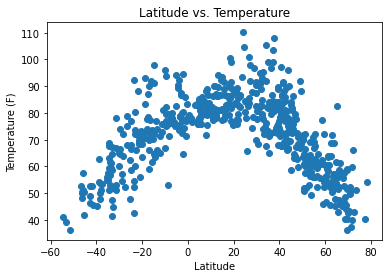

In [11]:
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

plt.scatter(scatlat,scattemp)

plt.title('Latitude vs. Temperature')

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.savefig('zaheer - latvstemp.png')

plt.show()

## Latitude vs. Humidity Plot

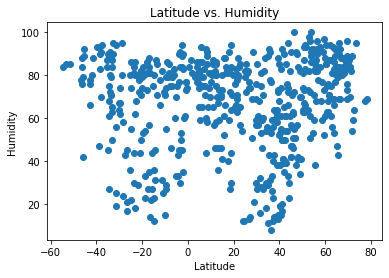

In [12]:
scatlat = weather_data["Latitude"]
scattemp = weather_data["Humidity"]

plt.scatter(scatlat,scattemp)

plt.title('Latitude vs. Humidity')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig('zaheer - latvstemp.png')

plt.show()

## Latitude vs. Cloudiness Plot

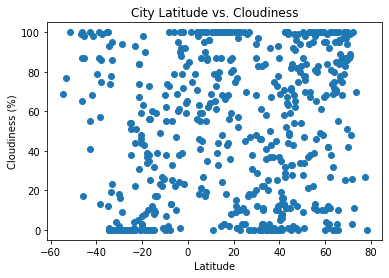

In [13]:
cloud = weather_data["Cloudiness"]

plt.scatter(scatlat,cloud)

plt.title('City Latitude vs. Cloudiness')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('zaheer - scatplotlatitudecloudiness')

plt.show()

## Latitude vs. Wind Speed Plot

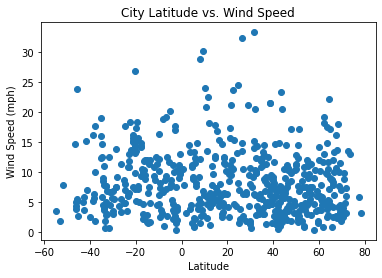

In [14]:
wind = weather_data["Wind Speed"]

plt.scatter(scatlat,wind)

plt.title('City Latitude vs. Wind Speed')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('zaheer - scatplotlatitudewindspeed')

plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r-")
    
    plt.annotate (line_eq,text_coordinates,fontsize=14,color="red")
    
    plt.xlabel("Latitude")
    
    plt.ylabel(title)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.show()


In [16]:
# Create Northern and Southern Hemisphere DataFrames

north_df = weather_data.loc[weather_data["Latitude"] >= 0,:]

south_df = weather_data.loc[weather_data["Latitude"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7429571732550727


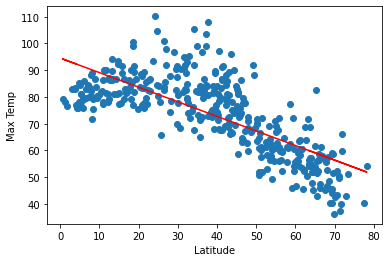

The  r value indicates a  negative correlation between latitude and temperature.


<Figure size 432x288 with 0 Axes>

In [17]:
x_values = north_df["Latitude"]
y_values = north_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('zaheer - northerntemplat')

print("The  r value indicates a  negative correlation between latitude and temperature.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7659976761254728


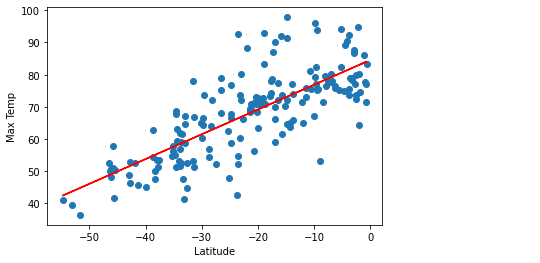

The  r value indicates a  positive correlation between latitude and temperature.


<Figure size 432x288 with 0 Axes>

In [18]:
x_values = south_df["Latitude"]
y_values = south_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('zaheer - southerntemplat')

print("The  r value indicates a  positive correlation between latitude and temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12163010711064857


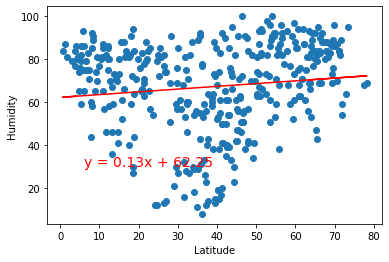

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('zaheer - northernhumlat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.1847279667179916


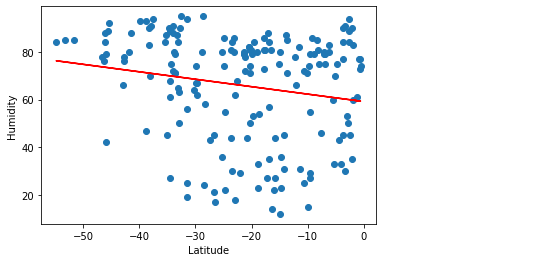

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('zaheer - southernhumlat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014692198036088204


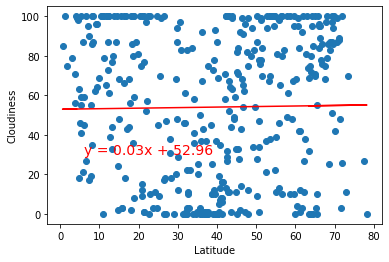

The r-value indicates that there is no relationship.


<Figure size 432x288 with 0 Axes>

In [21]:
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('zaheer - northerncloudlat')
print("The r-value indicates that there is no relationship.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.03336406657230857


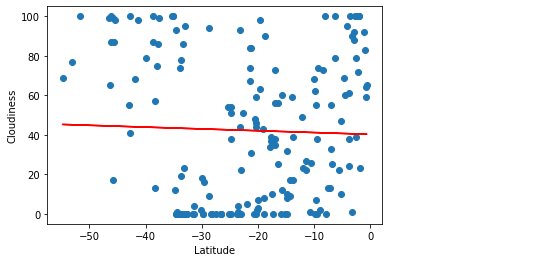

The r-value indicates that there is no relationship.


<Figure size 432x288 with 0 Axes>

In [22]:
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('zaheer - southerncloudlat')
print("The r-value indicates that there is no relationship.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.11669230501485812


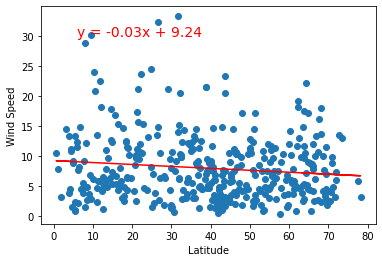

The r-value indicates that there is no relationship.


<Figure size 432x288 with 0 Axes>

In [23]:
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('zaheer - northernwindlat')
print("The r-value indicates that there is no relationship.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07685203202610917


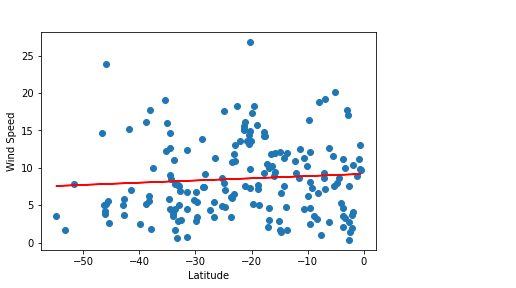

The r-value indicates that there is no relationship.


<Figure size 432x288 with 0 Axes>

In [24]:
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('zaheer - southernwindlat')
print("The r-value indicates that there is no relationship.")